## Save Memory into RAM in LangGraph

### Overview

This demo explains how to save conversation history only in RAM. 

In [ ]:
from langchain_core.messages import HumanMessage
from langchain_openai import ChatOpenAI
from langgraph.graph import START, END, StateGraph
from langgraph.graph.message import MessagesState
from langgraph.checkpoint.memory import MemorySaver
from IPython.display import Image, display

from dotenv import load_dotenv
load_dotenv()

True

### 1. **Helper Function for Running Graphs**

- A `run_graph` helper function is created to simplify invoking the graph repeatedly:
    - Takes a query, the graph object, and a `thread_id`.

In [3]:
llm = ChatOpenAI(
    model="gpt-4o-mini",
    temperature=0.0,
)

In [4]:
def run_graph(query:str, graph:StateGraph, thread_id:int):
    output = graph.invoke(
        config={"configurable":{"thread_id": thread_id}},
        input={"messages":[HumanMessage(query)]}
    )
    return output

In [ ]:
def chatbot(state: MessagesState):
    ai_message = llm.invoke(state["messages"])
    return {"messages": ai_message}

### 2. **In-Memory Workflow Setup**

#### a. **Workflow Definition**

- A simple workflow with a single `chatbot` node.
- State: Based on `MessageState`.

In [ ]:
workflow = StateGraph(MessagesState)

workflow.add_node(chatbot)
workflow.add_edge(START, "chatbot")
workflow.add_edge("chatbot", END)

#### b. **MemorySaver Checkpointer**

- A **MemorySaver** is used to checkpoint states in RAM only.

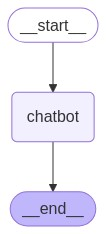

In [5]:
checkpointer = MemorySaver()
in_memory_graph = workflow.compile(checkpointer=checkpointer)

display(
    Image(
        in_memory_graph.get_graph().draw_mermaid_png()
    )
)

#### c. **Execution**

- Thread 1: keep asking questions under the same thread.

In [6]:
run_graph(
    query="Hi",
    graph=in_memory_graph, 
    thread_id="1"
)

{'messages': [HumanMessage(content='Hi', id='24260574-1721-4e88-8080-3b465e8c9cae'),
  AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 8, 'total_tokens': 18, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_0392822090', 'finish_reason': 'stop', 'logprobs': None}, id='run-5ad837b2-640c-413d-9c83-d279cc77796a-0', usage_metadata={'input_tokens': 8, 'output_tokens': 10, 'total_tokens': 18})]}

In [7]:
run_graph(
    query="My name is Tim.",
    graph=in_memory_graph, 
    thread_id="1"
)

{'messages': [HumanMessage(content='Hi', id='24260574-1721-4e88-8080-3b465e8c9cae'),
  AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 8, 'total_tokens': 18, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_0392822090', 'finish_reason': 'stop', 'logprobs': None}, id='run-5ad837b2-640c-413d-9c83-d279cc77796a-0', usage_metadata={'input_tokens': 8, 'output_tokens': 10, 'total_tokens': 18}),
  HumanMessage(content='My name is Tim.', id='5dd479d2-af96-47c6-90c2-247b13fae7ac'),
  AIMessage(content='Nice to meet you, Tim! How can I help you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_t

In [8]:
run_graph(
    query="What's my name?",
    graph=in_memory_graph, 
    thread_id="1"
)

{'messages': [HumanMessage(content='Hi', id='24260574-1721-4e88-8080-3b465e8c9cae'),
  AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 8, 'total_tokens': 18, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_0392822090', 'finish_reason': 'stop', 'logprobs': None}, id='run-5ad837b2-640c-413d-9c83-d279cc77796a-0', usage_metadata={'input_tokens': 8, 'output_tokens': 10, 'total_tokens': 18}),
  HumanMessage(content='My name is Tim.', id='5dd479d2-af96-47c6-90c2-247b13fae7ac'),
  AIMessage(content='Nice to meet you, Tim! How can I help you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_t

- Test another thread

In [10]:
run_graph(
    query="What's my name?",
    graph=in_memory_graph, 
    thread_id="2"
)

{'messages': [HumanMessage(content="What's my name?", id='9f7b4fd4-28f8-4ee9-955f-eacd15a37c25'),
  AIMessage(content="I'm sorry, but I don't have access to personal information about you unless you've shared it in this conversation. How can I assist you today?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 29, 'prompt_tokens': 11, 'total_tokens': 40, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_0392822090', 'finish_reason': 'stop', 'logprobs': None}, id='run-44d922d0-bf53-44fa-8579-63da0567f202-0', usage_metadata={'input_tokens': 11, 'output_tokens': 29, 'total_tokens': 40})]}

In [11]:
list(
    in_memory_graph.get_state(
        config={"configurable":{"thread_id": "1"}}
    )
)

[{'messages': [HumanMessage(content='Hi', id='24260574-1721-4e88-8080-3b465e8c9cae'),
   AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 8, 'total_tokens': 18, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_0392822090', 'finish_reason': 'stop', 'logprobs': None}, id='run-5ad837b2-640c-413d-9c83-d279cc77796a-0', usage_metadata={'input_tokens': 8, 'output_tokens': 10, 'total_tokens': 18}),
   HumanMessage(content='My name is Tim.', id='5dd479d2-af96-47c6-90c2-247b13fae7ac'),
   AIMessage(content='Nice to meet you, Tim! How can I help you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 15, 'prom

### Conclusions

- **MemorySaver** is temporary; disappears when the session ends.
- **Thread IDs** differentiate multiple parallel conversations.